In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:
df = pd.DataFrame(columns=['CustomerID','Gender','Age','ServiceLength (months)','ContractType','MonthlyCharges (USD)','TotalCharges (USD)','Churn'])
df

,CustomerID,Gender,Age,ServiceLength (months),ContractType,MonthlyCharges (USD),TotalCharges (USD),Churn


In [ ]:
id = [1001,1002,1003,1004,1005]
age = [42,35,62,52,28]
gender = ['Male','Female','Male','Female','Male']
service = [24,12,48,36,6]
contract = ['Two-Year','One-Year','Month-to-Month','One-Year','Month-to-Month']
monthly_charges = [85.00,79.50,94.20,78.25,68.75]
total_charges = [2040.00,942.50,4567.75,2853.50,452.25]
churn = ['No','Yes','Yes','No','No']

In [ ]:
contract_choice = ['Two-Year','One-Year','Month-to-Month']
gender_choice = ['Male','Female']
churn_choice = ['Yes','No']
random.seed(45)
for i in range(6,1001):
  Age = random.randint(18,85)
  g = random.choice(gender_choice)
  Contract = random.choice(contract_choice)
  c = random.choice(churn_choice)
  s = random.randint(1,80)
  m = round(random.uniform(30.00, 100.00), 2)
  id.append(1000+i)
  age.append(Age)
  gender.append(g)
  service.append(s)
  contract.append(Contract)
  churn.append(c)
  monthly_charges.append(m)
  total_charges.append(m*s)

In [ ]:
df['CustomerID'] = id
df['Age'] = age
df['Gender'] = gender
df['ServiceLength (months)'] = service
df['ContractType'] = contract
df['MonthlyCharges (USD)'] = monthly_charges
df['TotalCharges (USD)'] = total_charges
df['Churn'] = churn
df

,CustomerID,Gender,Age,ServiceLength (months),ContractType,MonthlyCharges (USD),TotalCharges (USD),Churn
0,1001,Male,42,24,Two-Year,85.00,2040.00,No
1,1002,Female,35,12,One-Year,79.50,942.50,Yes
2,1003,Male,62,48,Month-to-Month,94.20,4567.75,Yes
3,1004,Female,52,36,One-Year,78.25,2853.50,No
4,1005,Male,28,6,Month-to-Month,68.75,452.25,No
...,...,...,...,...,...,...,...,...
995,1996,Female,45,64,One-Year,71.89,4600.96,No
996,1997,Male,54,38,Month-to-Month,90.41,3435.58,No
997,1998,Male,80,74,Two-Year,47.57,3520.18,No
998,1999,Male,48,24,Month-to-Month,96.19,2308.56,Yes


In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
ServiceLength (months)    0
ContractType              0
MonthlyCharges (USD)      0
TotalCharges (USD)        0
Churn                     0
dtype: int64

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
for col in df.columns:
  if df[col].dtype == 'int' or df[col].dtype == 'float64':
    outliers = find_outliers_IQR(df[col])
    print("Number of outliers in",col,":",len(outliers))

Number of outliers in CustomerID : 0
Number of outliers in Age : 0
Number of outliers in ServiceLength (months) : 0
Number of outliers in MonthlyCharges (USD) : 0
Number of outliers in TotalCharges (USD) : 2


In [ ]:
grouped_data = df.groupby(['Gender', 'ContractType', 'Churn']).size().unstack()

grouped_data

Churn                   No  Yes
Gender ContractType            
Female Month-to-Month   89   66
       One-Year         94   84
       Two-Year         79   78
Male   Month-to-Month   86   96
       One-Year         71   85
       Two-Year        100   72

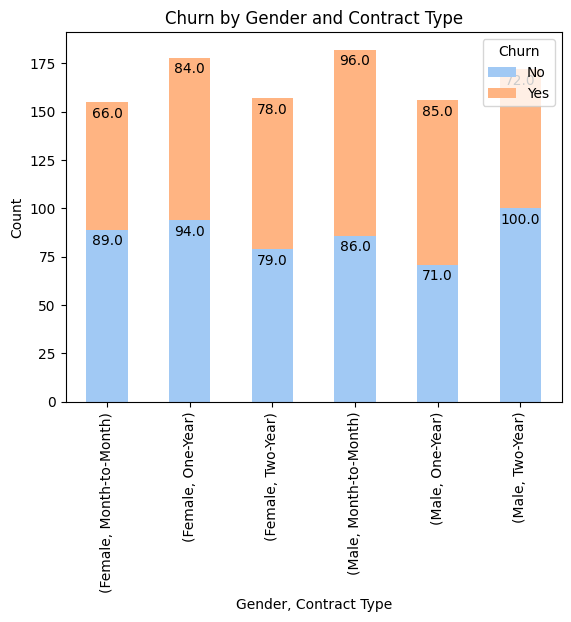

In [ ]:
ax = grouped_data.plot(kind='bar', stacked=True)

plt.title('Churn by Gender and Contract Type')
plt.xlabel('Gender, Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')

# Adding annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height - 8), ha='center')
plt.show()

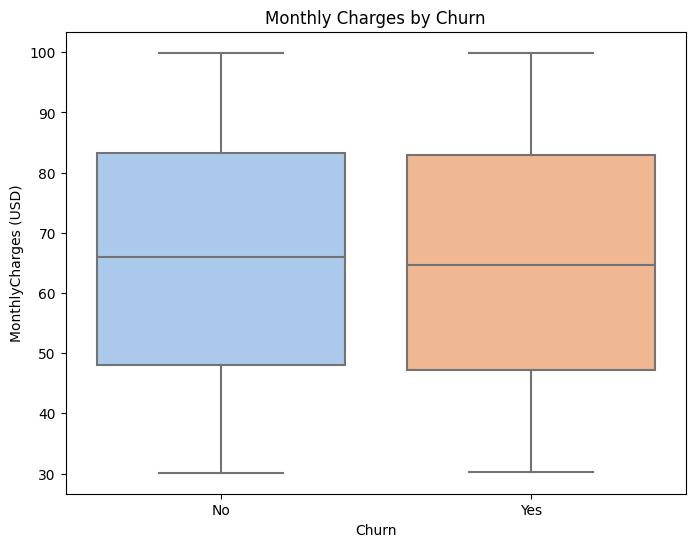

In [ ]:
# Boxplot of MonthlyCharges by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges (USD)')
plt.title('Monthly Charges by Churn')
plt.show()

In [ ]:
scaler = MinMaxScaler()
df['ServiceLength (months)'] = scaler.fit_transform(df[['ServiceLength (months)']])
df['MonthlyCharges (USD)'] = scaler.fit_transform(df[['MonthlyCharges (USD)']])
df['TotalCharges (USD)'] = scaler.fit_transform(df[['TotalCharges (USD)']])

In [ ]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['ContractType'] = encoder.fit_transform(df['ContractType'])
df['Churn'] = encoder.fit_transform(df['Churn'])

In [ ]:
df

,CustomerID,Gender,Age,ServiceLength (months),ContractType,MonthlyCharges (USD),TotalCharges (USD),Churn
0,1001,1,42,0.291139,2,0.786216,0.258817,0
1,1002,0,35,0.139241,1,0.707408,0.117249,1
2,1003,1,62,0.594937,0,0.918040,0.584877,1
3,1004,0,52,0.443038,1,0.689497,0.363752,0
4,1005,1,28,0.063291,0,0.553374,0.054010,0
...,...,...,...,...,...,...,...,...
995,1996,0,45,0.797468,1,0.598367,0.589161,0
996,1997,1,54,0.468354,0,0.863734,0.438836,0
997,1998,1,80,0.924051,2,0.249893,0.449749,0
998,1999,1,48,0.291139,0,0.946554,0.293459,1


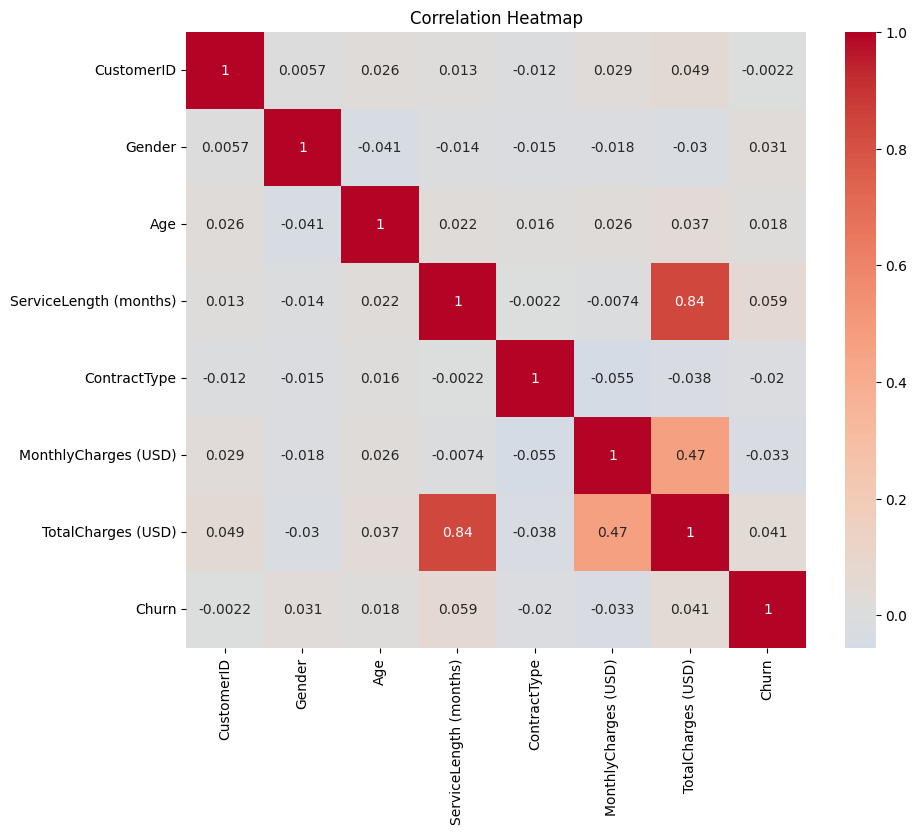

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = df[['ServiceLength (months)','TotalCharges (USD)']]
y = df[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
accuracies = []
matrix = []
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
predicted_lr = model_lr.predict(X_test)
accuracies.append(accuracy_score(y_test, predicted_lr))
matrix.append(confusion_matrix(y_test,predicted_lr))
# RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
predicted_rf = model_rf.predict(X_test)
accuracies.append(accuracy_score(y_test, predicted_rf))
matrix.append(confusion_matrix(y_test,predicted_rf))

In [ ]:
models = ['Logistic Regression', 'Random Forest']  # Names of the models

plot_data = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

fig = px.bar(
    plot_data,
    x='Model',
    y='Accuracy',
    text='Accuracy',  # Add accuracy as text on bars
    color='Model',    # Use different colors for different models
    title='Accuracy Scores of Different Models'
)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')  # Format the annotation text
fig.update_layout(xaxis_title='Model', yaxis_title='Accuracy')
fig.show()

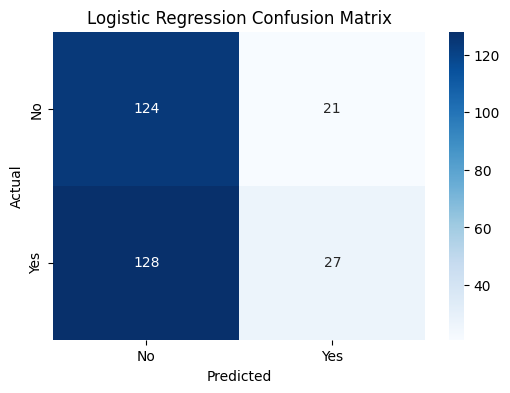

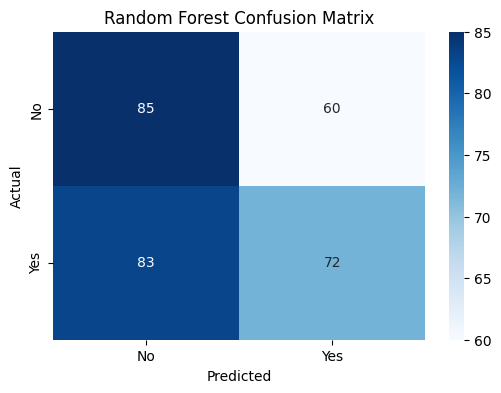

In [ ]:
for i, model_name in enumerate(['Logistic Regression', 'Random Forest']):
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix[i], annot=True, fmt="d", cmap="Blues",
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
# Save the model as a .pkl file
model_filename = 'random_forest_model.pkl'
joblib.dump(model_rf, model_filename)

['random_forest_model.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib
app = Flask(__name__)

# Load the saved Random Forest model
model_filename = 'random_forest_model.pkl'
model = joblib.load(model_filename)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get input data from JSON request
        data = request.get_json()

        # Convert input data to DataFrame
        input_data = pd.DataFrame(data)

        # Make predictions using the loaded model
        predictions = model.predict(input_data)

        # Convert predictions to a list
        predictions_list = predictions.tolist()

        return jsonify({'predictions': predictions_list})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)